In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [65]:
data=pd.read_csv('marketing_campaign.csv',header=0,sep='\t')

In [66]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [67]:
data = data.dropna()

In [68]:
data['Age'] = 2021 - data.Year_Birth

In [69]:
data["Total_spending"] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]+ data["MntGoldProds"]

In [70]:
data.Marital_Status = data.Marital_Status.replace({'Together': 'Partner',
                                                           'Married': 'Partner',
                                                           'Divorced': 'Alone',
                                                           'Widow': 'Alone', 
                                                           'Alone': 'Alone',
                                                           'Absurd': 'Alone',
                                                           'YOLO': 'Alone'})

In [71]:
data['Children'] = data['Kidhome'] + data['Teenhome']

In [72]:
data.loc[(data['Age'] >= 10) & (data['Age'] <= 19), 'AgeGroup'] = 'Teen'
data.loc[(data['Age'] >= 20) & (data['Age']<= 39), 'AgeGroup'] = 'Adult'
data.loc[(data['Age'] >= 40), 'AgeGroup'] = 'Senior'

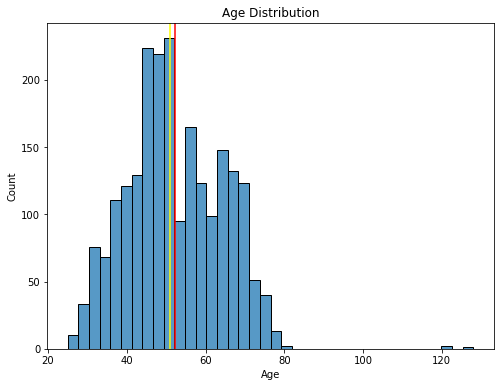

In [73]:
plt.figure(figsize=(8,6))
sns.histplot(data["Age"])
plt.title("Age Distribution")
plt.axvline(data["Age"].median(), color="yellow", label=f"Median of Age : {data['Age'].median()}")
plt.axvline(data["Age"].mean(), color="red", label=f"Mean of Age : {data['Age'].mean()}");

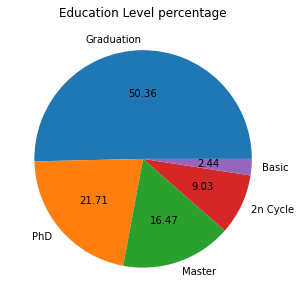

In [74]:
labels = list(data["Education"].value_counts().index)
values = list(data["Education"].value_counts().values)

plt.figure(figsize=(5, 5))
plt.pie(values, labels=labels, autopct="%.2f")
plt.title("Education Level percentage");

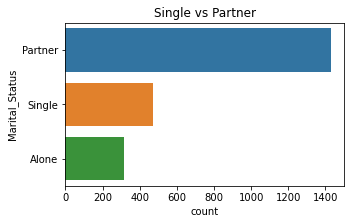

In [75]:
plt.figure(figsize=(5,3))
sns.countplot(y="Marital_Status", data=data, order=data["Marital_Status"].value_counts().index)
plt.title("Single vs Partner");

analysing the col of purchsing

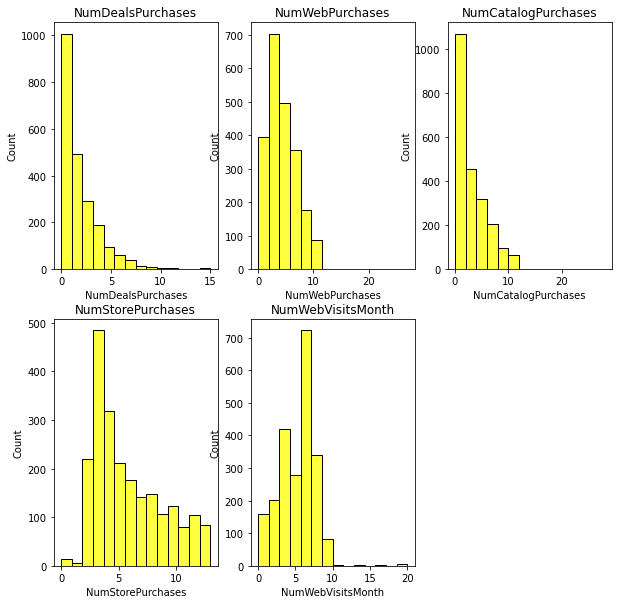

In [76]:
columns_pur = ["NumDealsPurchases", "NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]
plt.figure(figsize=(10,10))
for i in range(1,6):
    plt.subplot(2,3,i)
    sns.histplot(data[columns_pur[i-1]], color="yellow", bins=14)
    plt.title(columns_pur[i-1])

# Modeling for KMeans Algorithm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [94]:
col1= data.drop(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Kidhome', 'Teenhome', 'MntWines', 'MntFruits','MntMeatProducts',
                          'MntFishProducts', 'MntSweetProducts', 'MntGoldProds','Dt_Customer', 'Z_CostContact',
                          'Z_Revenue', 'Recency', 'NumDealsPurchases', 'NumWebPurchases','NumCatalogPurchases',
                          'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
                          'AcceptedCmp1', 'AcceptedCmp2', 'Complain',  'Response', 'AgeGroup'], axis=1)

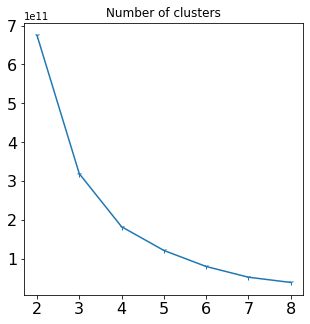

In [101]:
from sklearn.cluster import KMeans

range1 = range(2,9)
inertias = []

for n_clusters in options:
    model = KMeans(n_clusters, random_state=42).fit(col1)
    inertias.append(model.inertia_)

plt.figure(figsize=(5,5))    
plt.title("Number of clusters")
plt.plot(range1, inertias, '-1')
plt.xticks( fontsize=16)
plt.yticks( fontsize=16);

In [109]:
model = KMeans(n_clusters=4, init='k-means++', random_state=52).fit(X)

preds = model.predict(X)

data_kmeans = X.copy()
data_kmeans['clusters'] = preds

In [110]:
data_kmeans.clusters = data_kmeans.clusters.replace({1: 'Ordinary client',
                                                             2: 'Elite client',
                                                             3: 'Good client',
                                                             0: 'Potential good client'})

data['clusters'] = data_kmeans.clusters

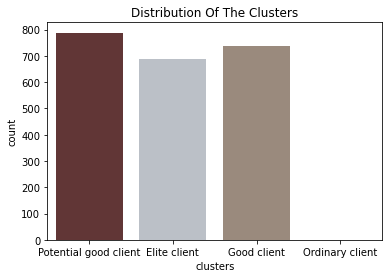

In [112]:
pal = ["#682F2F","#B9C0C9", "#9F8A78","#F3AB60"]
pl = sns.countplot(x=data["clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

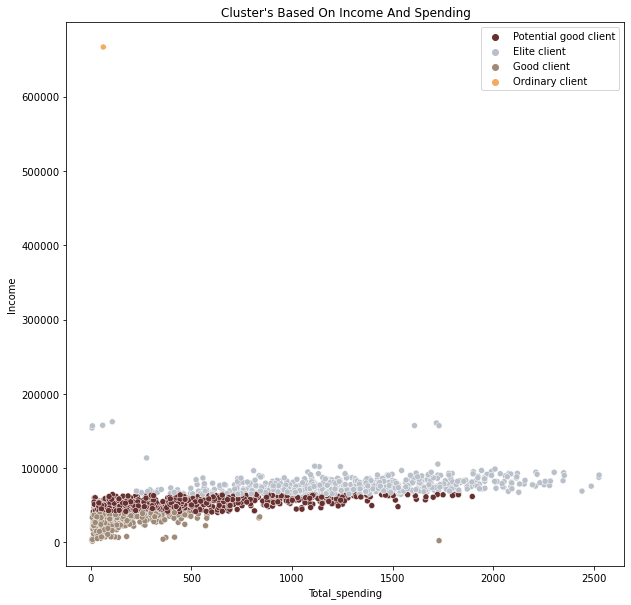

In [120]:
plt.figure(figsize=(10,10))
pl = sns.scatterplot(data = data,x=data["Total_spending"], y=data["Income"],hue=data["clusters"], palette= pal)
pl.set_title("Cluster's Based On Income And Spending")
plt.legend()
plt.show()

<Figure size 2160x1080 with 0 Axes>

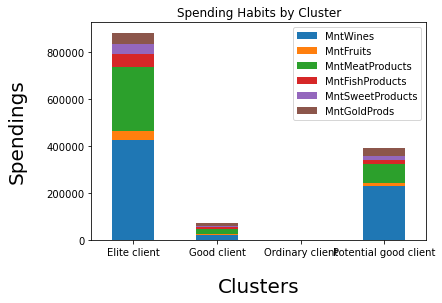

In [125]:
spendings = data.groupby('clusters')[['MntWines', 'MntFruits','MntMeatProducts', 
                                                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

plt.figure(figsize=(30,15))
spendings.plot(kind='bar', stacked=True)

plt.title('Spending Habits by Cluster')
plt.xlabel('Clusters', fontsize=20, labelpad=20)
plt.ylabel('Spendings', fontsize=20, labelpad=20);
plt.xticks(rotation=0, ha='center');